In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
!pip install torchsummary
os.getcwd()

'/content'

Loads the utils and models python file

In [17]:
%run /content/drive/MyDrive/ColabNotebooks/Session5/utils.py

<Figure size 640x480 with 0 Axes>

In [18]:
%run /content/drive/MyDrive/ColabNotebooks/Session5/models.py

CODE BLOCK: 1

In [19]:
#Necessary Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [20]:
# CUDA? : To check whether running in GPU mode
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


CODE BLOCK: 3

In [21]:
#Import the utils file
from drive.MyDrive.ColabNotebooks.Session5 import utils

CODE BLOCK: 4

CODE BLOCK: 5

In [22]:
#to check the load of utils
dir(utils)

['F',
 'GetDataLoader',
 'GetSampleImages',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'datasets',
 'plt',
 'test_transforms',
 'torch',
 'train_transforms',
 'transforms']

CODE BLOCK: 6

In [23]:
#Loads the training and test data for processing
train_loader, test_loader = GetDataLoader(batch_size=512)

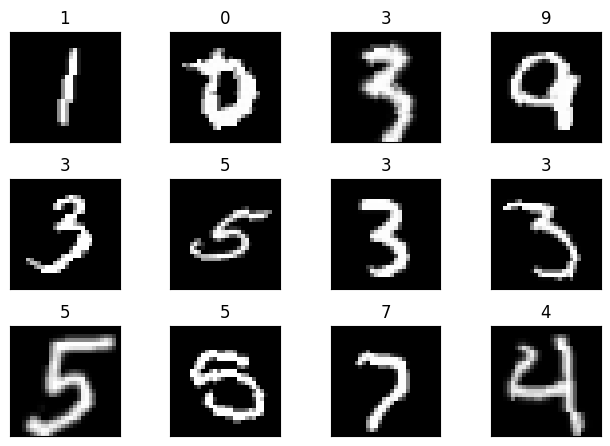

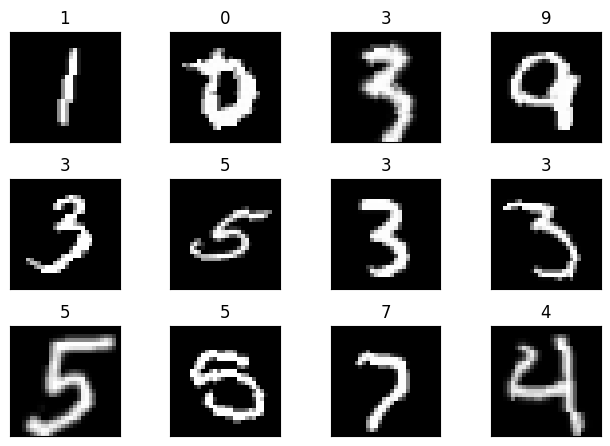

In [24]:
#View Sample Image
GetSampleImages(train_loader)

CODE BLOCK: 7

In [38]:
from drive.MyDrive.ColabNotebooks.Session5 import models

CODE BLOCK: 8

CODE BLOCK: 9

CODE BLOCK: 10

In [39]:
model = Net().to(device)
GetModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

criterion = nn.NLLLoss()
num_epochs = 20

train_losses, test_losses, train_acc, test_acc, test_incorrect_pred = Training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8442 Batch_id=117 Accuracy=35.30: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0010, Accuracy: 8388/10000 (83.88%)

Epoch 2


Train: Loss=0.1443 Batch_id=117 Accuracy=91.52: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0002, Accuracy: 9694/10000 (96.94%)

Epoch 3


Train: Loss=0.0880 Batch_id=117 Accuracy=95.92: 100%|██████████| 118/118 [00:22<00:00,  5.15it/s]


Test set: Average loss: 0.0001, Accuracy: 9794/10000 (97.94%)

Epoch 4


Train: Loss=0.0824 Batch_id=117 Accuracy=96.97: 100%|██████████| 118/118 [00:23<00:00,  4.96it/s]


Test set: Average loss: 0.0001, Accuracy: 9818/10000 (98.18%)

Epoch 5


Train: Loss=0.1366 Batch_id=117 Accuracy=97.34: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.0001, Accuracy: 9863/10000 (98.63%)

Epoch 6


Train: Loss=0.0312 Batch_id=117 Accuracy=97.70: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0001, Accuracy: 9872/10000 (98.72%)

Epoch 7


Train: Loss=0.0560 Batch_id=117 Accuracy=97.93: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0001, Accuracy: 9890/10000 (98.90%)

Epoch 8


Train: Loss=0.1928 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0001, Accuracy: 9897/10000 (98.97%)

Epoch 9


Train: Loss=0.0596 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.0001, Accuracy: 9912/10000 (99.12%)

Epoch 10


Train: Loss=0.0483 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:23<00:00,  4.97it/s]


Test set: Average loss: 0.0001, Accuracy: 9888/10000 (98.88%)

Epoch 11


Train: Loss=0.0237 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0001, Accuracy: 9907/10000 (99.07%)

Epoch 12


Train: Loss=0.0335 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0001, Accuracy: 9920/10000 (99.20%)

Epoch 13


Train: Loss=0.0129 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:23<00:00,  4.93it/s]


Test set: Average loss: 0.0001, Accuracy: 9899/10000 (98.99%)

Epoch 14


Train: Loss=0.0037 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:23<00:00,  5.01it/s]


Test set: Average loss: 0.0000, Accuracy: 9918/10000 (99.18%)

Epoch 15


Train: Loss=0.0798 Batch_id=117 Accuracy=98.90: 100%|██████████| 118/118 [00:25<00:00,  4.67it/s]


Test set: Average loss: 0.0000, Accuracy: 9921/10000 (99.21%)

Epoch 16


Train: Loss=0.0569 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)

Epoch 17


Train: Loss=0.0098 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0000, Accuracy: 9921/10000 (99.21%)

Epoch 18


Train: Loss=0.0379 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0000, Accuracy: 9912/10000 (99.12%)

Epoch 19


Train: Loss=0.0094 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0000, Accuracy: 9922/10000 (99.22%)

Epoch 20


Train: Loss=0.0653 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0000, Accuracy: 9935/10000 (99.35%)



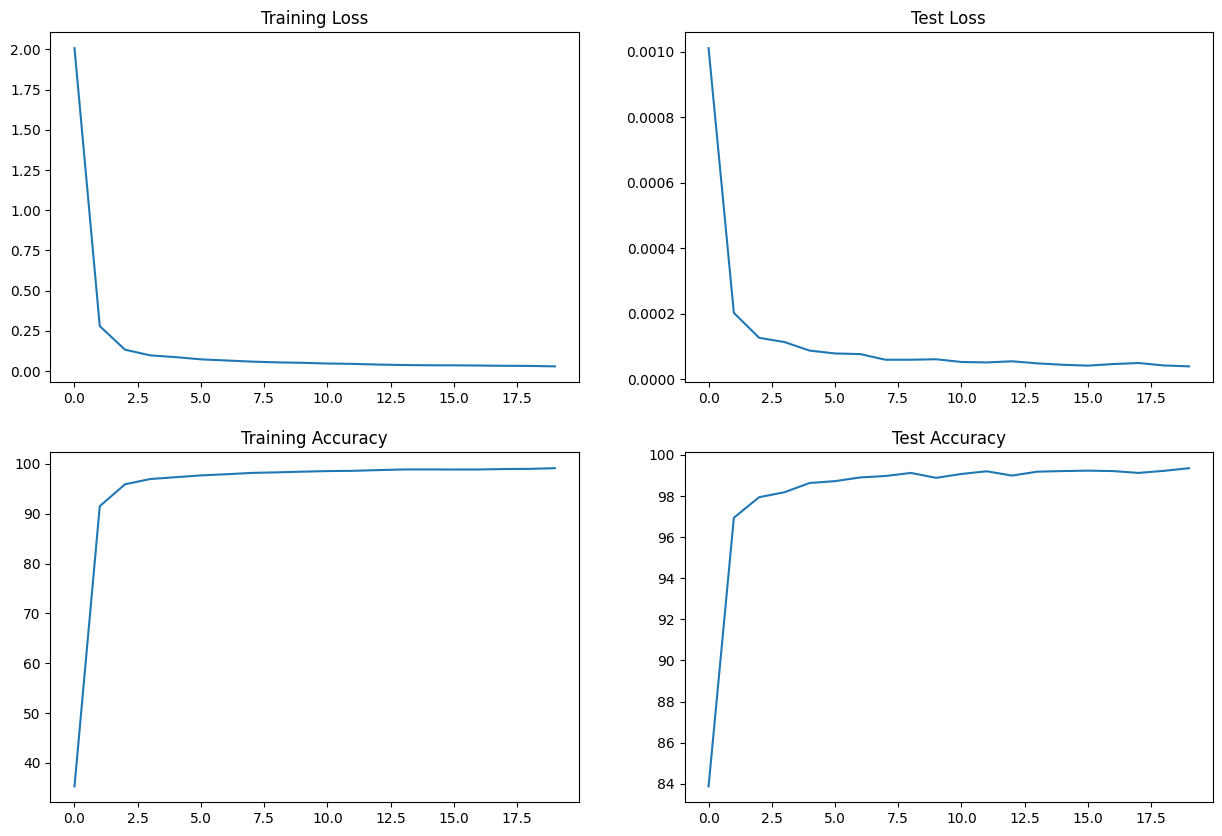

In [40]:
GetTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)